In [27]:
# sınıflandırma - kümeleme
"""
Sınıflandırma (Categorization):
Pandas'ta sınıflandırma, bir veri setindeki benzersiz değerleri gruplamak veya kategorilere ayırmak anlamına gelir.
Bu işlem genellikle kategorik (nominal veya ordinal) veri tipleri üzerinde uygulanır. 

Kümeleme (Clustering):
Pandas'ta kümeleme, benzer özelliklere sahip veri noktalarını gruplandırmak anlamına gelir. 
Kümeleme genellikle sayısal veri üzerinde uygulanır ve benzer özelliklere sahip veri noktalarını aynı küme içine yerleştirir.
Pandas doğrudan kümeleme algoritmaları sağlamaz, ancak kümeleme işlemleri için scikit-learn gibi diğer kütüphanelerle birlikte kullanılabilir.
"""

In [28]:
import pandas as pd
df= pd.read_csv("resources/customer_data.csv")
df

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,58987926,5,NaN,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000


In [29]:
df.info()  # boş veri var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,1125.0,2.000000e-01,4.001779e-01,0.0,0.0,0.000000e+00,0.000000e+00,1.000000e+00
id,1125.0,5.783677e+07,1.817150e+06,54982353.0,54990497.0,5.898975e+07,5.899799e+07,5.900624e+07
fea_1,1125.0,5.482667e+00,1.383338e+00,1.0,4.0,5.000000e+00,7.000000e+00,7.000000e+00
fea_2,976.0,1.283911e+03,5.176402e+01,1116.5,1244.0,1.281500e+03,1.314500e+03,1.481000e+03
fea_3,1125.0,2.333333e+00,8.787730e-01,1.0,1.0,3.000000e+00,3.000000e+00,3.000000e+00
fea_4,1125.0,1.208836e+05,8.844523e+04,15000.0,72000.0,1.020000e+05,1.390000e+05,1.200000e+06
fea_5,1125.0,1.928889e+00,2.571247e-01,1.0,2.0,2.000000e+00,2.000000e+00,2.000000e+00
fea_6,1125.0,1.087200e+01,2.676437e+00,3.0,8.0,1.100000e+01,1.100000e+01,1.600000e+01
fea_7,1125.0,4.832889e+00,2.971182e+00,-1.0,5.0,5.000000e+00,5.000000e+00,1.000000e+01
fea_8,1125.0,1.008027e+02,1.198896e+01,64.0,90.0,1.050000e+02,1.110000e+02,1.150000e+02


In [31]:
df.fea_2.mean(),df.fea_2.median() # boş verinin aritmetik ortalama ve medyan değerini hesapladık.

(1283.9113729508197, 1281.5)

In [32]:
df.fea_2.fillna(df.fea_2.mean(),inplace=True)  # boş verileri ort ile doldurduk.
df.isna().sum()  # boş veri var mı diye baktık yok.

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

In [33]:
df.label.value_counts()  # elimizde her bir veriden kaç tane var onu bulduk.

0    900
1    225
Name: label, dtype: int64

<AxesSubplot:title={'center':'Risk Dağılım Grafiği'}, xlabel='Risk_Duzeyi', ylabel='Toplam_Sayi'>

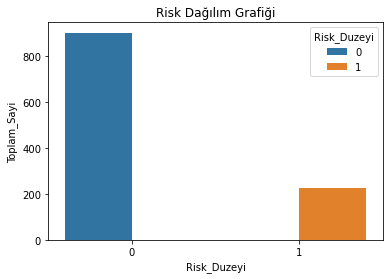

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

label_count = pd.DataFrame(
    {
        "Risk_Duzeyi" :df.label.value_counts().index,
        "Toplam_Sayi" :df.label.value_counts().values
    }
)
plt.title("Risk Dağılım Grafiği")
sns.barplot(data=label_count , x="Risk_Duzeyi", y="Toplam_Sayi", hue="Risk_Duzeyi")

#df["label"].value_counts().plot.bar() 

In [36]:
# X girişler 
X = df.drop("label", axis=1)

y = df.label # çıkışı aldık direkt 
y

0       1
1       0
2       0
3       1
4       0
       ..
1120    0
1121    0
1122    0
1123    0
1124    0
Name: label, Length: 1125, dtype: int64

In [38]:
# veri kümesini eğitim ve test setlerine böler.
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)   # stratify=y --> y ye göre verileri orantılı olarak böl 

In [39]:
# rastgele sınıflandırıcı modeli oluşturur ve bu modeli eğitir
from sklearn.ensemble import RandomForestClassifier 
model_rf =RandomForestClassifier()
model_rf.fit(X_train , y_train)  #Modeli eğitim verileri ile eğit

RandomForestClassifier()

In [41]:
# modelin başarısını öğrenme 
from sklearn.metrics import classification_report ,confusion_matrix   # confusion_matrix-->karmaşıklık matrisi 
print(classification_report(y_test,model_rf.predict(X_test)))  #model_rf.predict(X_test): Modeli kullanarak test verileri üzerinde tahminler yapar. Bu, modelin test verilerindeki sınıfları tahmin etmesini sağlar.
#classification_report(y_test, y_pred): Gerçek sınıflar (y_test) ile modelin tahmin ettiği sınıflar (y_pred) arasındaki performansı değerlendirmek için bir sınıflandırma raporu oluşturur

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       180
           1       0.25      0.04      0.08        45

    accuracy                           0.78       225
   macro avg       0.53      0.51      0.48       225
weighted avg       0.69      0.78      0.72       225



Precision (Hassasiyet): Pozitif olarak tahmin edilen örneklerin gerçekten pozitif olma olasılığı. Yüksek hassasiyet, yanlış pozitif tahminlerin az olduğunu gösterir.

Recall (Geri Çağırma): Gerçekten pozitif olan örneklerin kaçının doğru bir şekilde tahmin edildiği oranı. Yüksek geri çağırma, gerçek pozitiflerin çoğunlukla tahmin edildiğini gösterir.

F1-Score: Hassasiyet ve geri çağırma arasındaki dengeyi gösteren bir ölçü. Yüksek F1 puanı, hem hassasiyetin hem de geri çağırmanın yüksek olduğu bir modeli gösterir.

Support: Her bir sınıf için gerçekten kaç tane örnek olduğunu gösterir.

<AxesSubplot:>

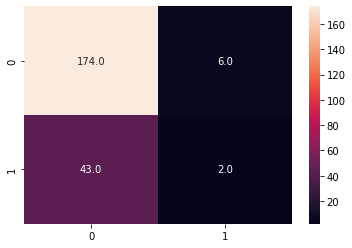

In [42]:
sns.heatmap(confusion_matrix(y_test,model_rf.predict(X_test)),annot=True,fmt=".1f")


y_pred = model_rf.predict(X_test): Modeli kullanarak test verileri üzerinde tahminler yapar.

confusion_matrix(y_test, y_pred): Gerçek sınıflar (y_test) ile modelin tahmin ettiği sınıflar (y_pred) arasındaki karışıklık matrisini oluşturur.

sns.heatmap(conf_matrix, annot=True, fmt=".1f", cmap='Blues'): Seaborn kütüphanesinin heatmap fonksiyonunu kullanarak karışıklık matrisinin ısı haritasını oluşturur. annot=True ile sayısal değerleri matris hücrelerine ekler, fmt=".1f" ile bu değerlerin bir ondalık basamağa kadar olmasını sağlar, cmap='Blues' ile renk haritasını mavi tonları olarak belirler.

plt.xlabel ve plt.ylabel: Eksen etiketleri ekler.

plt.show(): Oluşturulan ısı haritasını görüntüler.

In [ ]:
# 176 tanesi doğru tahmin , yanlış tahmin 49  175/

In [45]:
from sklearn.tree import DecisionTreeClassifier #Bu sınıf, karar ağacı sınıflandırıcı modelini uygular.

model_tree =DecisionTreeClassifier() #sınıfından bir örnek oluşturur.
model_tree.fit(X_train , y_train) # eğitim verileri üzerinde eğitir.

DecisionTreeClassifier()

In [46]:

print(classification_report(y_test,model_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       180
           1       0.24      0.29      0.26        45

    accuracy                           0.68       225
   macro avg       0.53      0.53      0.53       225
weighted avg       0.70      0.68      0.69       225



model_tree.predict(X_test): Karar ağacı modelini kullanarak test verileri üzerinde tahminler yapar.

classification_report(y_test, y_pred_tree): Gerçek sınıflar (y_test) ile karar ağacının tahmin ettiği sınıflar (y_pred_tree) arasındaki performansı değerlendirmek için bir sınıflandırma raporu oluşturur

<AxesSubplot:>

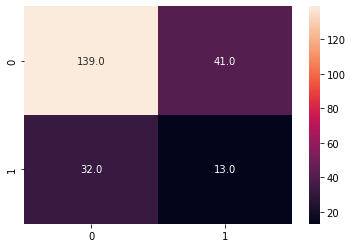

In [47]:
sns.heatmap(confusion_matrix(y_test,model_tree.predict(X_test)),annot=True,fmt=".1f")

In [ ]:
# fake veri üretme 



In [48]:
#conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Gamze\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    imbalanced-learn-0.11.0    |     pyhd8ed1ab_0         138 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         138 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.11.0-pyhd8ed1ab_0




imbalanced-learn-0.1 | 138 KB    |            |   0% 
imbalanced-learn-0.1 | 138 KB    | #1         |  12% 
imbalanced-learn-0.1 | 138 KB    | #########2 |  93% 
imbalanced-learn-0.1 | 138 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Retrieving noti



==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda




In [49]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler()
X_new ,y_new =sampler.fit_resample(X,y)

from imblearn.over_sampling import RandomOverSampler: imbalanced-learn kütüphanesinden RandomOverSampler sınıfını içeri aktarır.

sampler = RandomOverSampler(): RandomOverSampler sınıfından bir örnek oluşturur. Bu aşırı örnekleme yöntemi, nadir sınıfların örnek sayısını artırmak için rastgele örnek seçer.

X_new, y_new = sampler.fit_resample(X, y): fit_resample yöntemini kullanarak aşırı örnekleme işlemini gerçekleştirir. Bu yöntem, hem bağımsız değişkenlerin (X) hem de bağımlı değişkenin (y) üzerine uygulanır ve dengesizliği giderilmiş yeni bir veri kümesi (X_new ve y_new) oluşturulur.

Bu işlem, özellikle sınıflar arasındaki dengesizliği gidermek ve modelin daha dengeli bir şekilde öğrenmesini sağlamak için kullanılır.

In [51]:
y_new.value_counts()  # random veri sağlayarak verileri eşitledik.

1    900
0    900
Name: label, dtype: int64

In [53]:
X_newtr, X_newts,y_newtr,y_newts=train_test_split(X,y,test_size=0.2,random_state=42) 

In [54]:
# model kurma
model_rfn =RandomForestClassifier()
model_rfn.fit(X_newtr , y_newtr)

RandomForestClassifier()

In [55]:
print(classification_report(y_newts,model_rfn.predict(X_newts)))  # nasıl hesaplandığına bak

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       172
           1       0.17      0.02      0.03        53

    accuracy                           0.75       225
   macro avg       0.46      0.49      0.44       225
weighted avg       0.62      0.75      0.66       225



In [ ]:
# kümeleme : verileri ortak özelliklerine göre gruplandırmaya denir.